In [8]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df=pd.read_csv("../diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
null_rows=df[df.isnull().any(axis=1)]

print(null_rows)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

## n=100

In [24]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100, criterion='entropy')

model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [25]:
pred=model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        93
           1       0.69      0.51      0.58        61

    accuracy                           0.71       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.71      0.71      0.70       154

0.7142857142857143


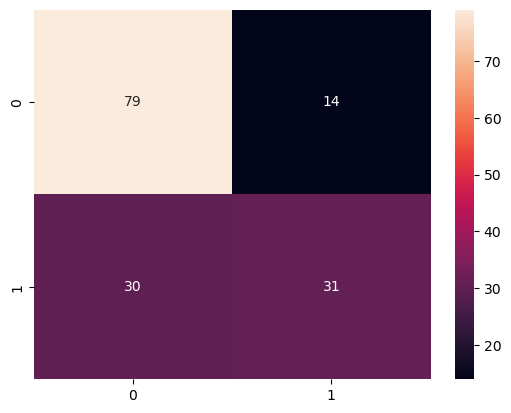

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## n=500

In [28]:
model=RandomForestClassifier(n_estimators=500, criterion='entropy')

model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [29]:
pred=model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        93
           1       0.72      0.48      0.57        61

    accuracy                           0.72       154
   macro avg       0.72      0.68      0.68       154
weighted avg       0.72      0.72      0.71       154

0.7207792207792207


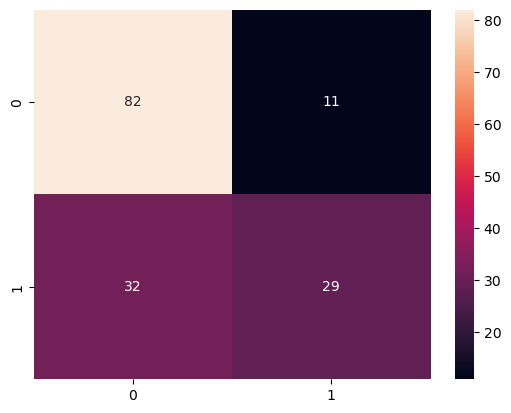

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## n=1000

In [33]:
model=RandomForestClassifier(n_estimators=1000, criterion='entropy')

model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [34]:
pred=model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79        93
           1       0.72      0.51      0.60        61

    accuracy                           0.73       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.73      0.73      0.72       154

0.7272727272727273


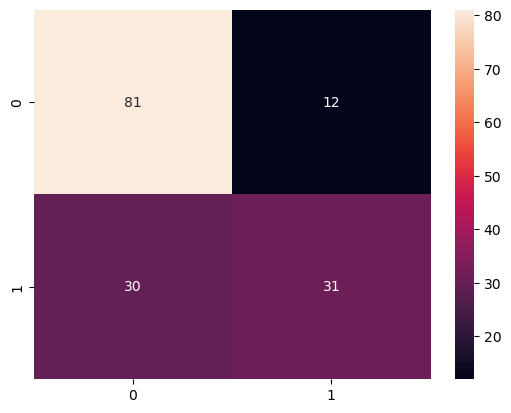

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## n=10 ???

In [37]:
model=RandomForestClassifier(n_estimators=10, criterion='entropy')

model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [38]:
pred=model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(classification_report(y_test, pred))
print(accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        93
           1       0.78      0.64      0.70        61

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.78       154

0.7857142857142857


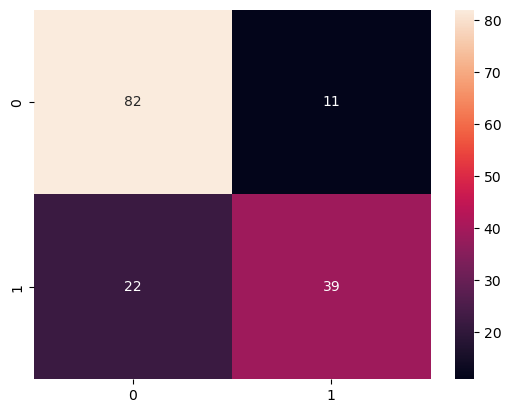

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

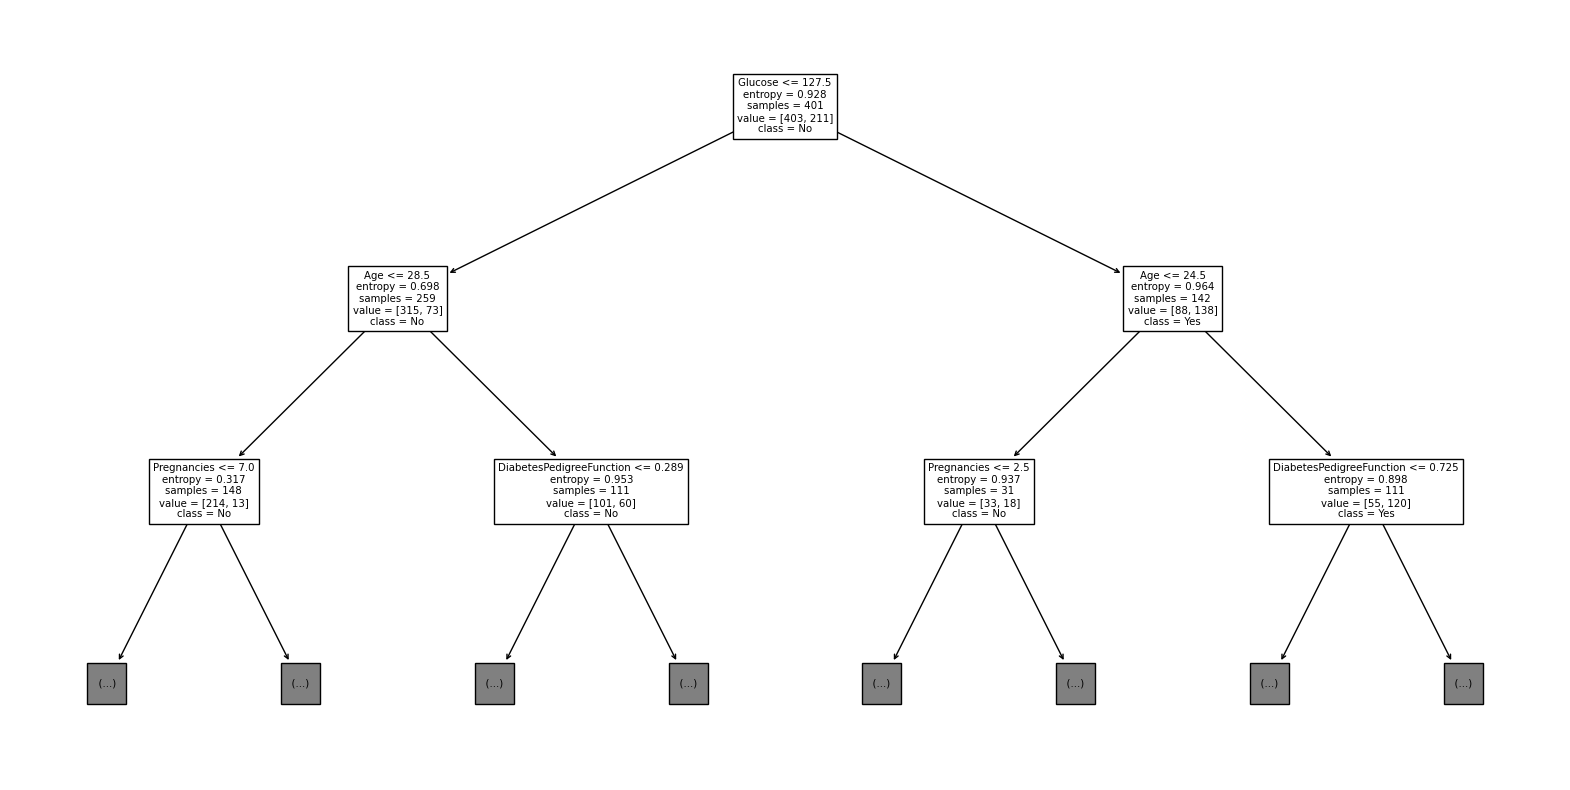

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

tree = model.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(tree, max_depth=2, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()